In [42]:
import pandas as pd
from src.modelado import categorizar_horas
from src.modelado import dividir_variables
from src.modelado import dividir_datos
from src.modelado import pipeline_preprocesamiento
from src.modelado import entrenar_modelo
from src.modelado import calcular_matriz_confusion
from src.modelado import graficar_matriz_confusion
from sklearn.ensemble import RandomForestClassifier

In [43]:
df = pd.read_csv("../data/tattoo_studio_clean.csv")
df.head()

,Age,Gender,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Customer_Satisfaction
0,46,Female,Friday,Pre-booked,Sleeve/Back,Minimalist,Artist B,9,3
1,32,Male,Saturday,Walk-in,Small,Custom,Artist C,1,2
2,25,Male,Friday,Pre-booked,Sleeve/Back,Custom,Artist A,10,1
3,38,Female,Friday,Pre-booked,Medium,Script,Artist D,4,4
4,36,Male,Wednesday,Pre-booked,Sleeve/Back,Tribal,Artist B,10,1


In [44]:
df["Session_Hours_Cat"] = df["Session_Hours"].apply(categorizar_horas)

In [45]:
y = df["Session_Hours_Cat"]
X = df.drop(columns=["Session_Hours", "Session_Hours_Cat"])

In [46]:
X_train, X_test, y_train, y_test = dividir_datos(X, y)

In [47]:
preprocesamiento = pipeline_preprocesamiento(X)

In [48]:
modelo = entrenar_modelo(preprocesamiento, X_train, y_train)

In [49]:
X, y = dividir_variables(df)

In [50]:
y_pred = modelo.predict(X_test)

In [51]:
y_pred = modelo.predict(X_test)
cm = calcular_matriz_confusion(y_test, y_pred)
cm

array([[232,  15,   0],
       [ 34,  81,   6],
       [  0,   1,  31]])

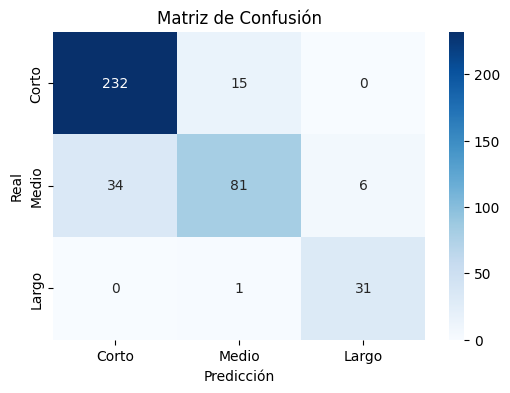

In [52]:
graficar_matriz_confusion(cm)


In [53]:

df["Session_Hours_Cat_Pred"] = modelo.predict(X)
df.to_csv("../data/tattoo_predictions.csv", index=False)
df.head()


,Age,Gender,Day_of_Week,Session_Type,Tattoo_Size,Tattoo_Style,Artist_Name,Session_Hours,Customer_Satisfaction,Session_Hours_Cat,Session_Hours_Cat_Pred
0,46,Female,Friday,Pre-booked,Sleeve/Back,Minimalist,Artist B,9,3,Largo,Largo
1,32,Male,Saturday,Walk-in,Small,Custom,Artist C,1,2,Corto,Corto
2,25,Male,Friday,Pre-booked,Sleeve/Back,Custom,Artist A,10,1,Largo,Largo
3,38,Female,Friday,Pre-booked,Medium,Script,Artist D,4,4,Medio,Medio
4,36,Male,Wednesday,Pre-booked,Sleeve/Back,Tribal,Artist B,10,1,Largo,Largo


In [54]:
df_clean = df.copy()
df_clean["Predicted_Session"] = modelo.predict(X)

In [60]:
df_clean.to_csv("../data/tattoo_studio_with_predictions.csv", index=False)